In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
%matplotlib inline


# Preprocesamiento de radianza Monterrey

In [91]:
data = pd.read_csv("/home/gsu/ESCOM/Trabajo_Terminal/Analisis_Imagenes_VNP46A1/data_municipios/municipios_completos.csv")
data["Fecha"] = pd.to_datetime(data["Fecha"])
mont = data[data["Municipio"] == "monterrey"]
mont.head()

,Fecha,Municipio,Cantidad_de_pixeles,Suma_de_radianza,Media_de_radianza,Desviacion_estandar_de_radianza,Maximo_de_radianza,Minimo_de_radianza,Percentil_25_de_radianza,Percentil_50_de_radianza,Percentil_75_de_radianza
336144,2012-01-19,monterrey,944,373556.0,395.716102,198.390563,1493.0,13.0,270.75,399.0,518.00
336145,2012-01-20,monterrey,944,362033.0,383.509534,177.839208,926.0,32.0,304.00,396.0,482.25
336146,2012-01-21,monterrey,944,481412.0,509.970339,239.903408,1166.0,13.0,361.00,532.0,671.50
336147,2012-01-22,monterrey,944,543319.0,575.549788,277.077984,1665.0,8.0,426.00,609.5,748.50
336148,2012-01-23,monterrey,944,158478.0,167.879237,52.857943,318.0,35.0,131.00,168.0,207.00


<Figure size 1200x800 with 0 Axes>

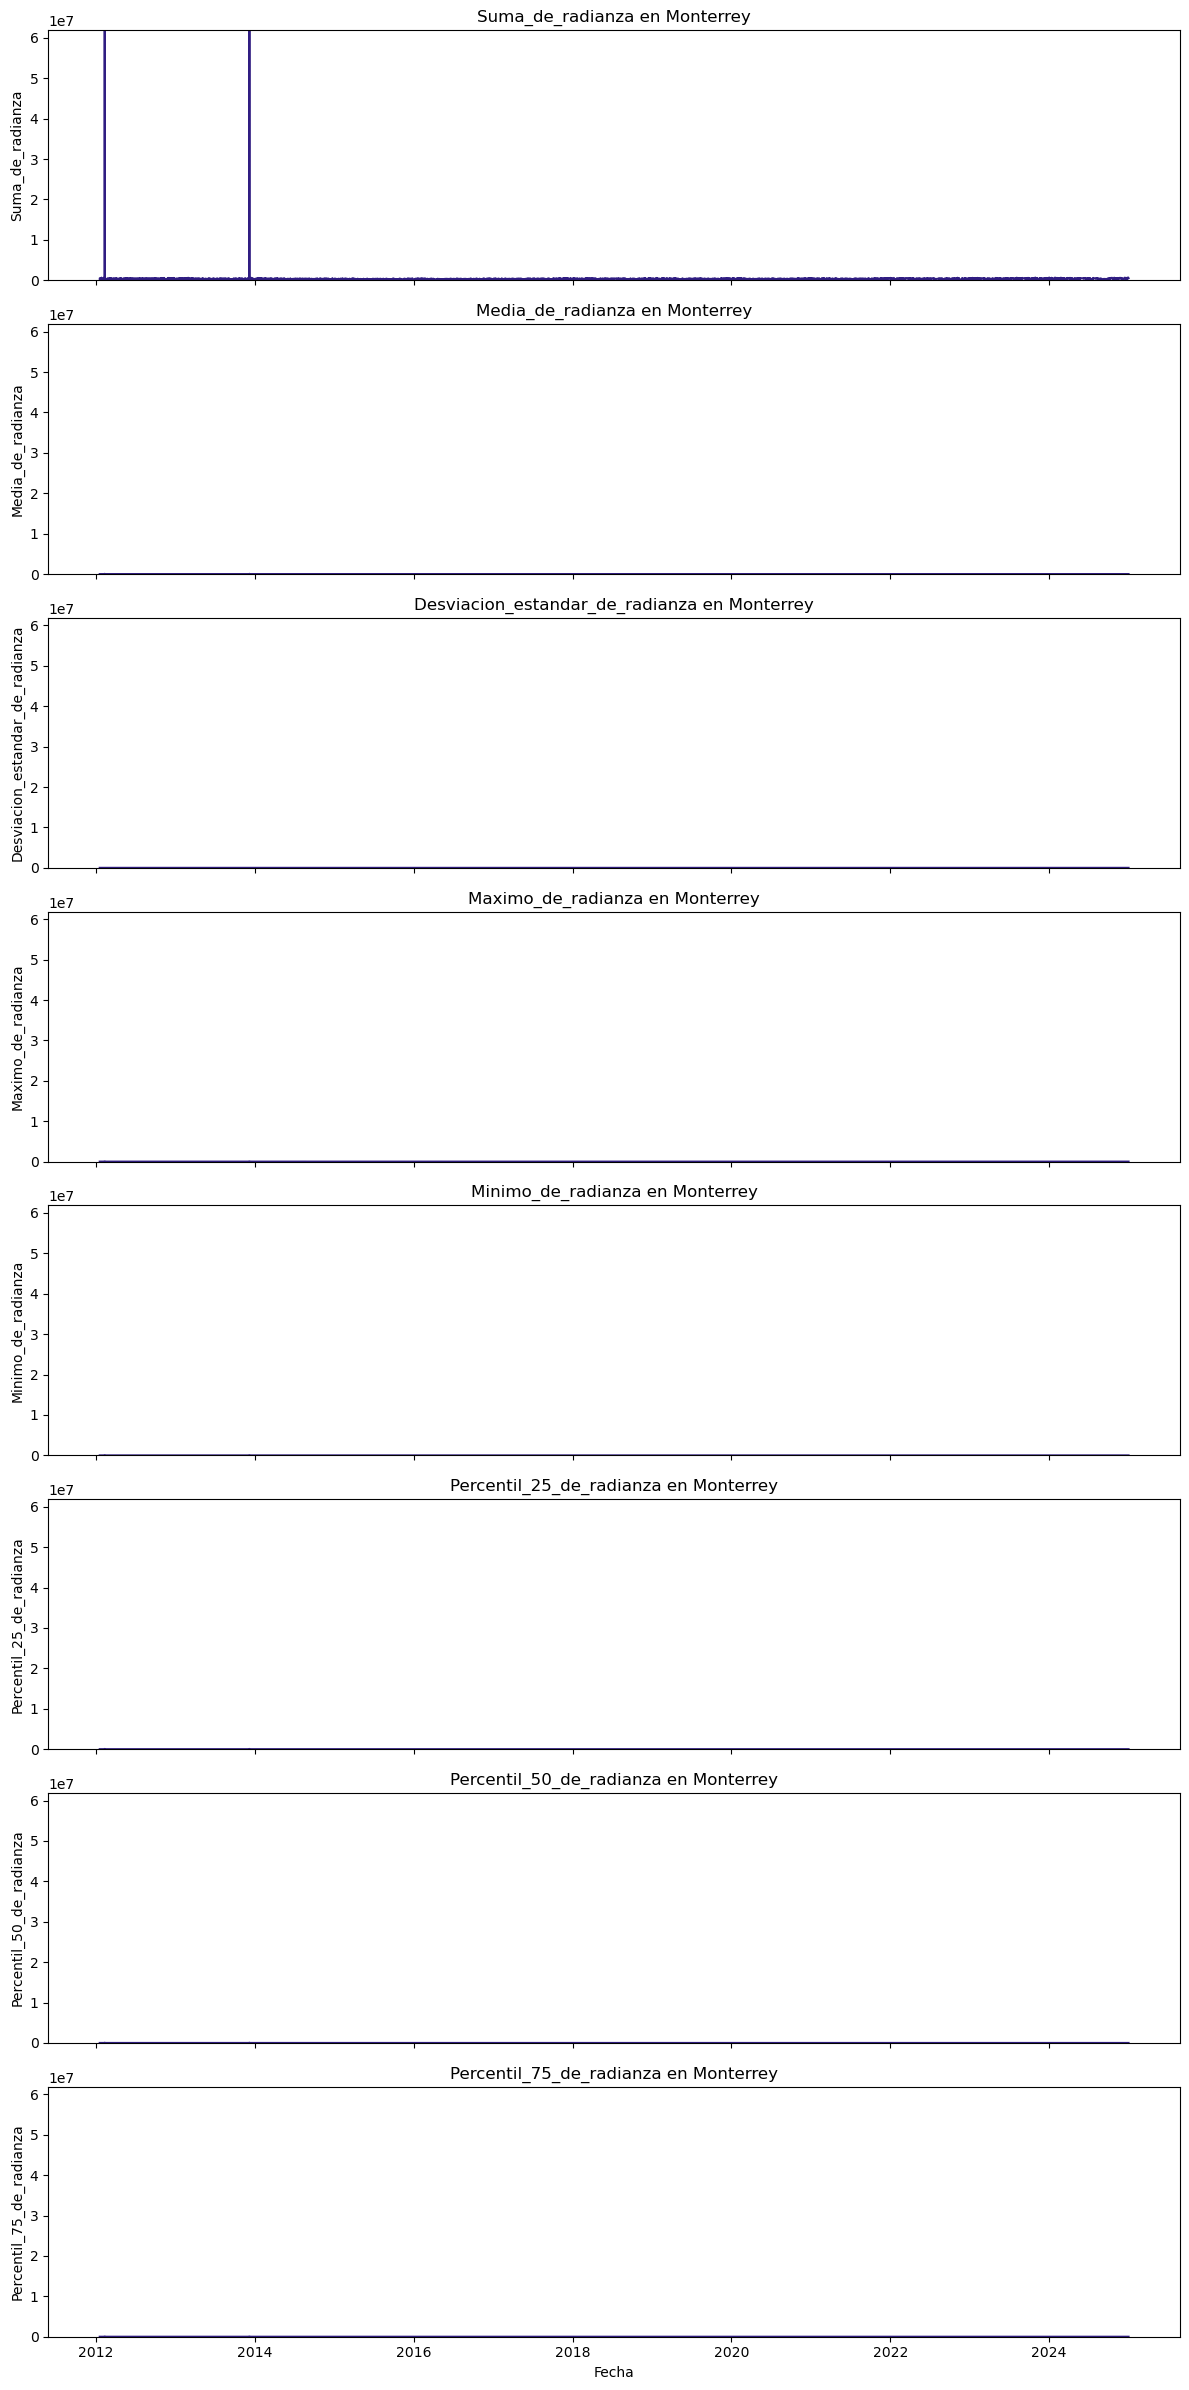

In [92]:
plt.figure(figsize=(12, 8))
medidas = mont.iloc[:, 3:].columns

y_min = np.inf
y_max = -np.inf
for medida in medidas:
    col_min = mont[medida].min()
    col_max = mont[medida].max()
    if col_min < y_min:
        y_min = col_min
    if col_max > y_max:
        y_max = col_max

y_max += 1e3

fig, axes = plt.subplots(len(medidas), 1, figsize=(12, 3 * len(medidas)), sharex=True)
if len(medidas) == 1:
    axes = [axes]
for i, medida in enumerate(medidas):
    sns.lineplot(ax=axes[i], data=mont, x="Fecha", y=medida, color="#301D82")
    axes[i].set_title(f"{medida} en Monterrey")
    axes[i].set_xlabel("Fecha")
    axes[i].set_ylabel(medida)
    axes[i].set_ylim([y_min, y_max])
plt.tight_layout()
plt.show()

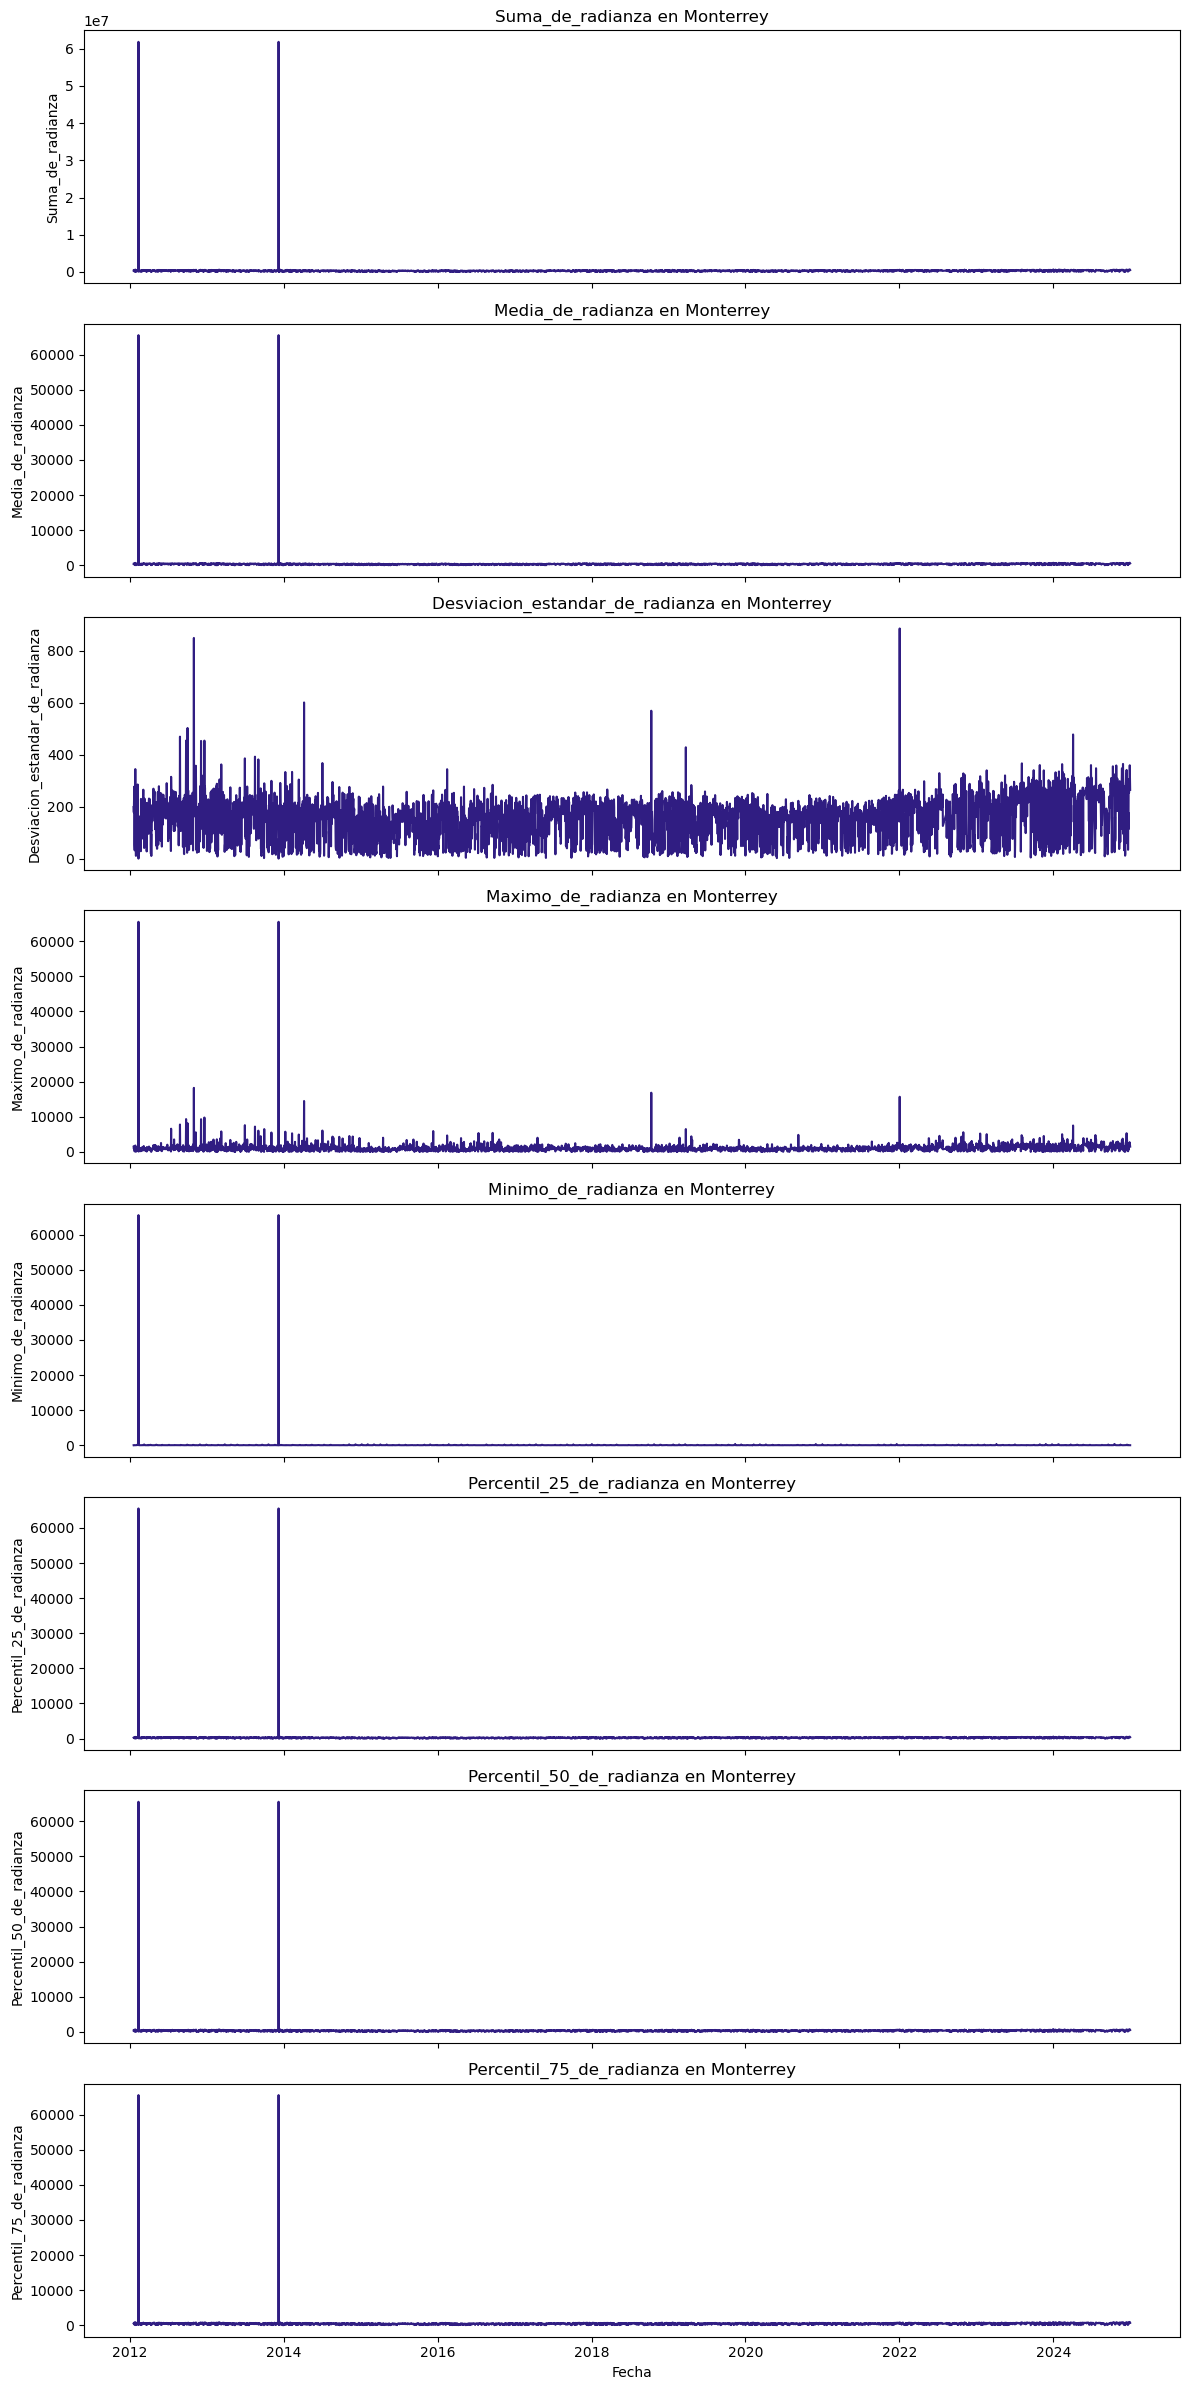

In [93]:
fig, axes = plt.subplots(len(medidas), 1, figsize=(12, 3 * len(medidas)), sharex=True)
if len(medidas) == 1:
    axes = [axes]
for i, medida in enumerate(medidas):
    sns.lineplot(ax=axes[i], data=mont, x="Fecha", y=medida, color="#301D82")
    axes[i].set_title(f"{medida} en Monterrey")
    axes[i].set_xlabel("Fecha")
    axes[i].set_ylabel(medida)
plt.tight_layout()
plt.show()

## Identificando fechas problematicas

In [94]:
fechas = mont.sort_values(by = "Suma_de_radianza", ascending = False).iloc[:2]["Fecha"].values
mont = mont[~mont["Fecha"].isin(fechas)]

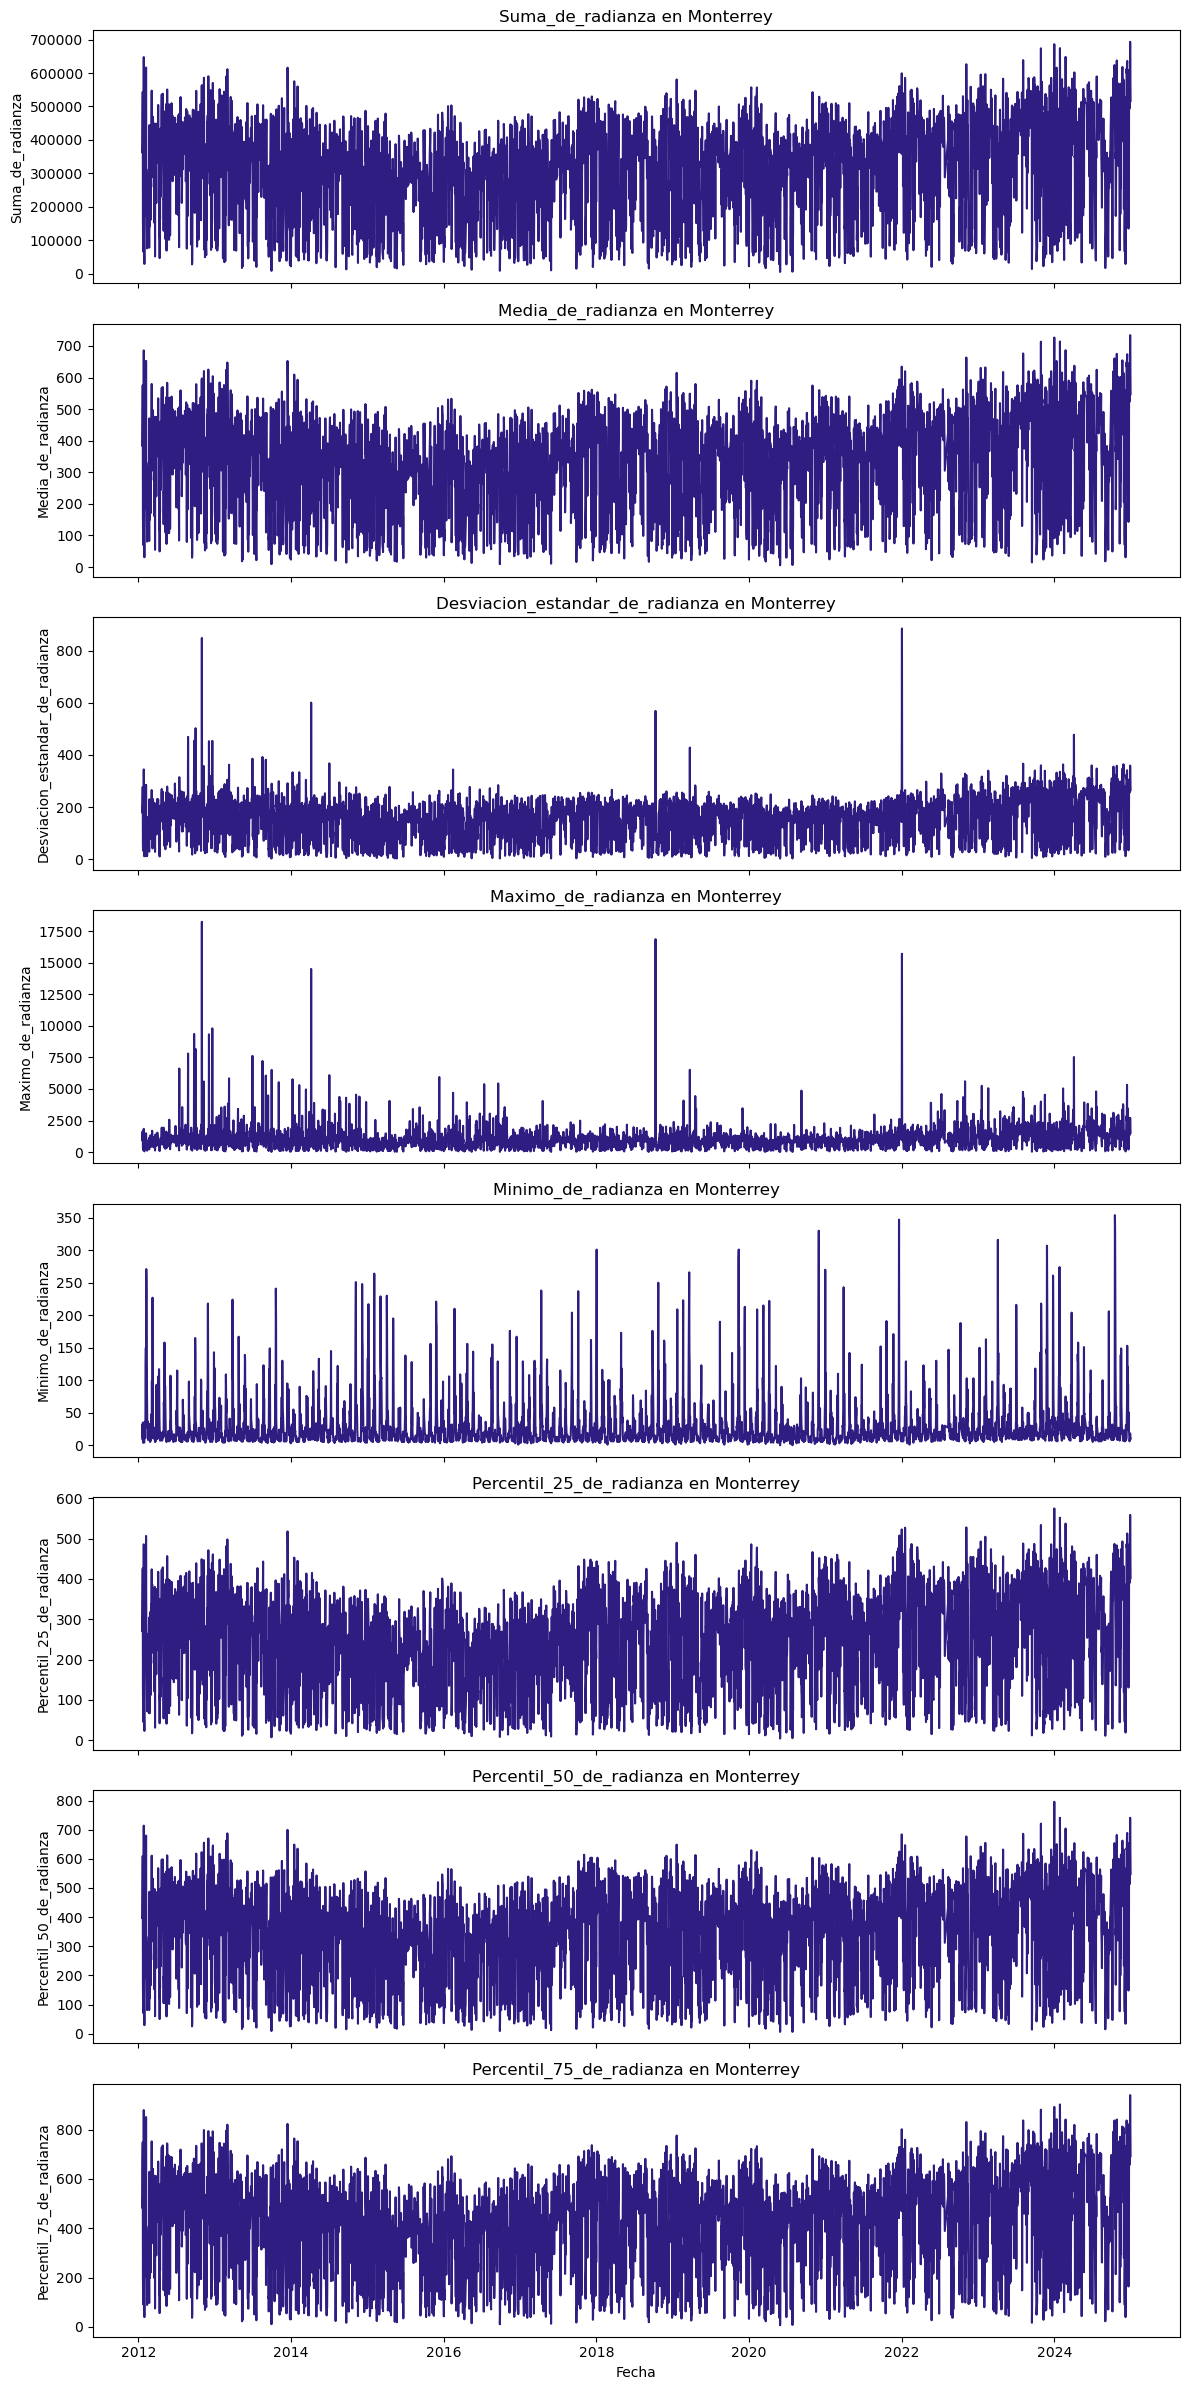

In [95]:
fig, axes = plt.subplots(len(medidas), 1, figsize=(12, 3 * len(medidas)), sharex=True)
if len(medidas) == 1:
    axes = [axes]
for i, medida in enumerate(medidas):
    sns.lineplot(ax=axes[i], data=mont, x="Fecha", y=medida, color="#301D82")
    axes[i].set_title(f"{medida} en Monterrey")
    axes[i].set_xlabel("Fecha")
    axes[i].set_ylabel(medida)
plt.tight_layout()
plt.show()

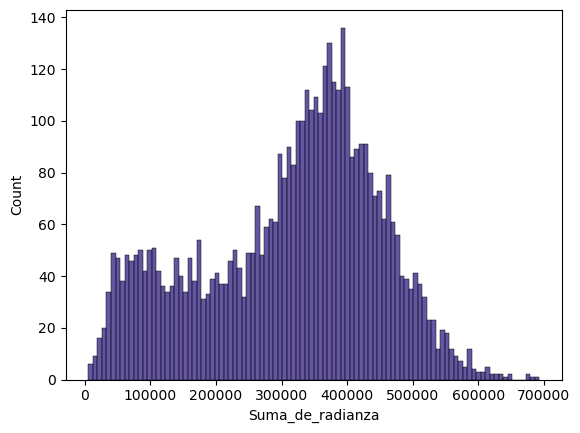

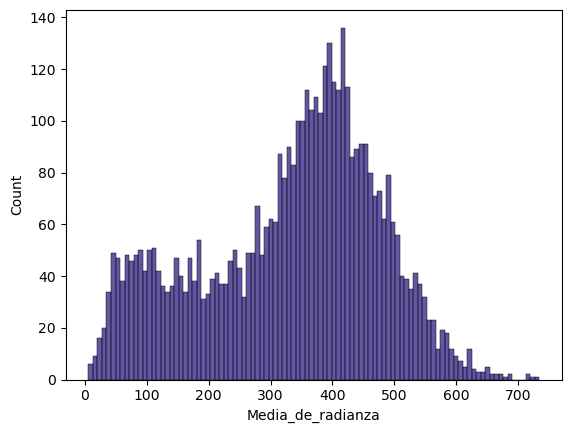

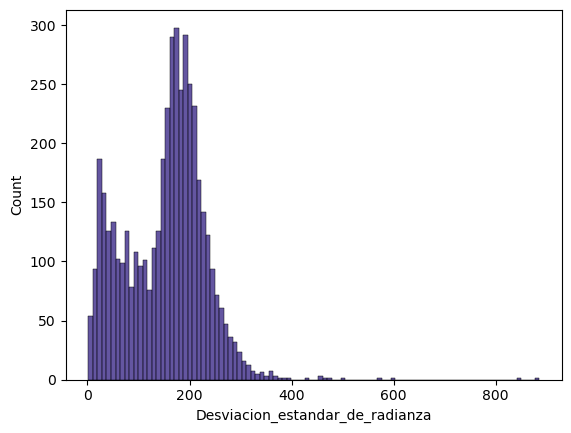

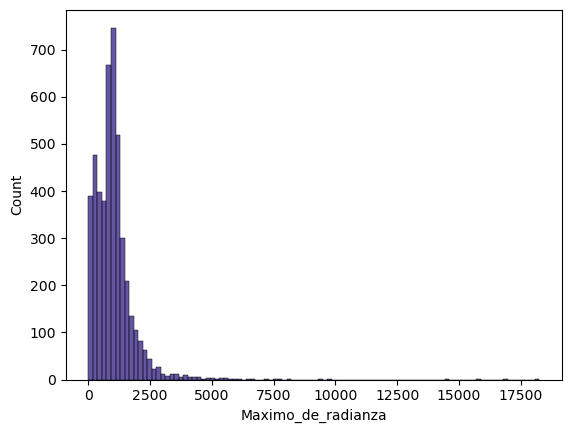

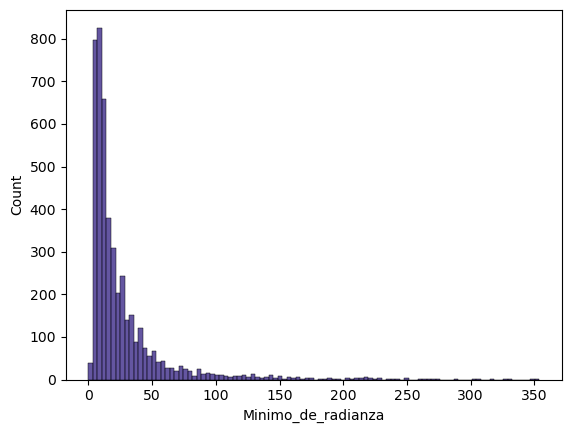

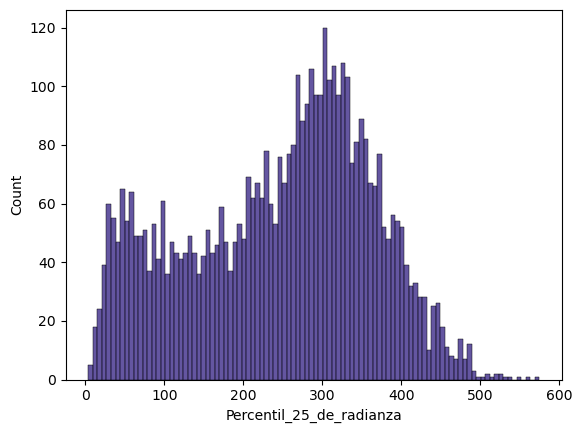

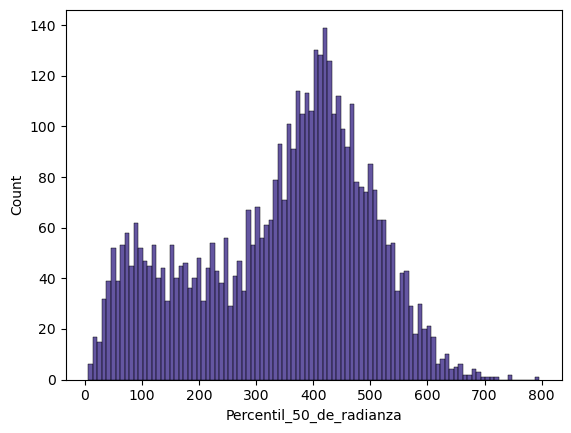

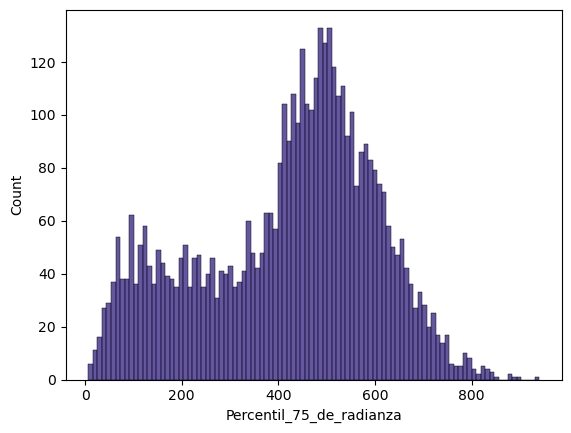

In [96]:
for medida in medidas:
    sns.histplot(data=mont, x=medida, bins=100, color="#301D82")
    plt.show()

# Aplicando STL

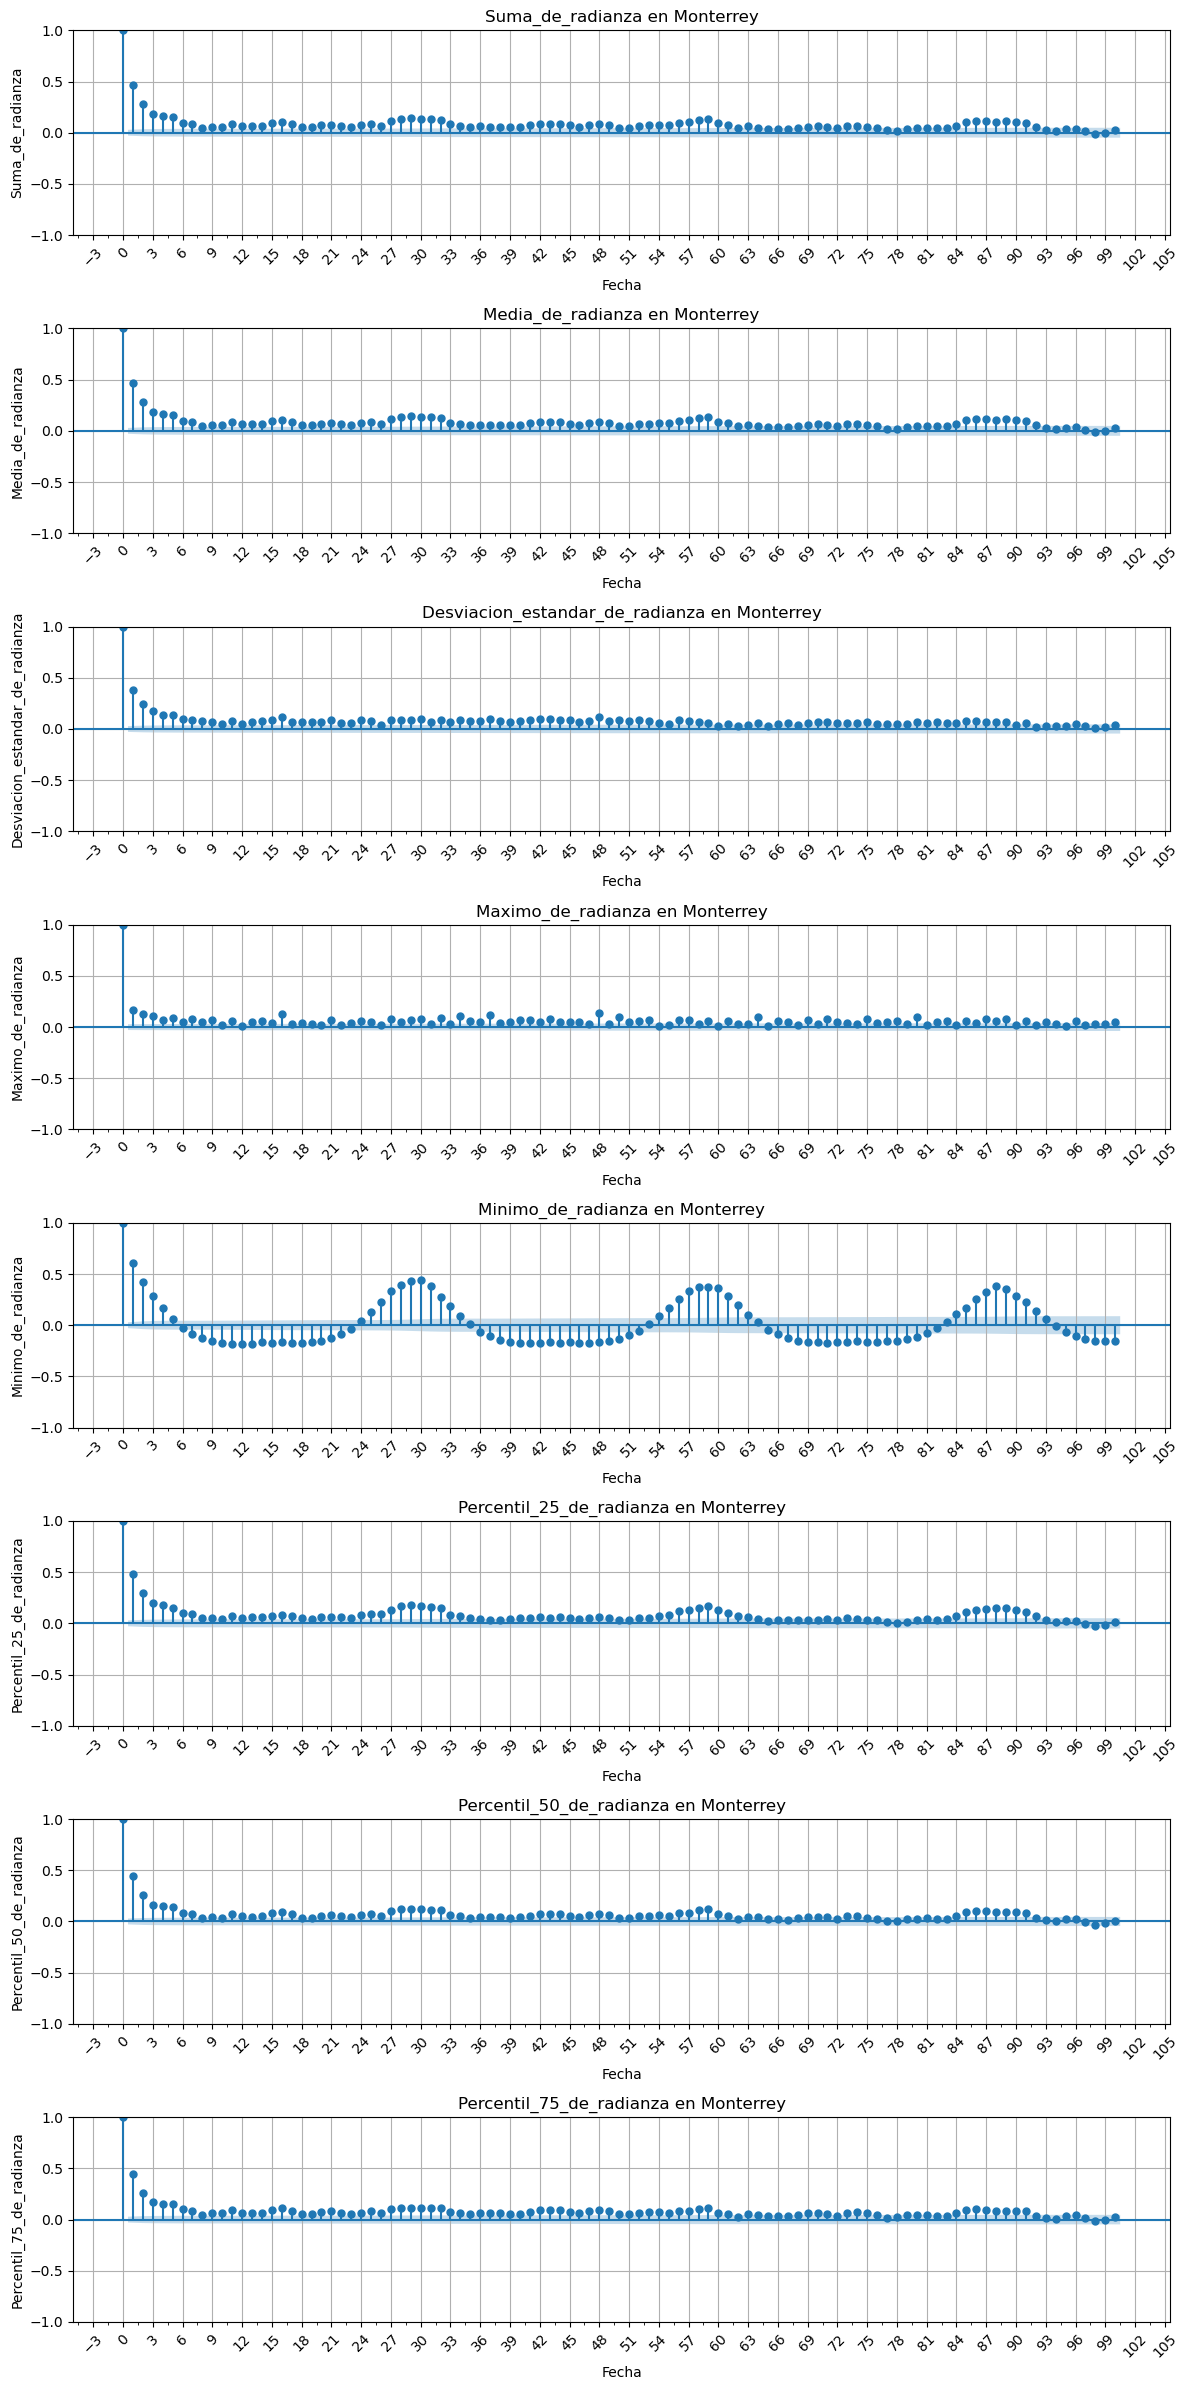

In [97]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.ticker as mticker

fig, axes = plt.subplots(len(medidas), 1, figsize=(12, 3 * len(medidas)), sharex=False)  # Cambia sharex a False
if len(medidas) == 1:
    axes = [axes]
for i, medida in enumerate(medidas):
    plot_acf(mont[medida], ax=axes[i], lags=100)
    axes[i].set_title(f"{medida} en Monterrey")
    axes[i].set_xlabel("Fecha")
    axes[i].set_ylabel(medida)
    # Forzar más valores en el eje x
    axes[i].xaxis.set_major_locator(mticker.MaxNLocator(nbins=40, integer=True))
    axes[i].xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    axes[i].tick_params(axis='x', which='major', labelrotation=45)
    axes[i].grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

mont_trend = {
    "fecha": mont["Fecha"],
    "municipio": mont["Municipio"],
    "total_pixeles": mont["Cantidad_de_pixeles"],
}

for i, medida in enumerate(medidas):
    
    stl = STL(mont[medida], period=28)
    res = stl.fit()
    # Extraer componente de trend
    trend = res.trend
    mont_trend[medida] = trend

    fig = res.plot()
    fig.set_size_inches(12, 8)
    plt.show()

mont_trend = pd.DataFrame(mont_trend)

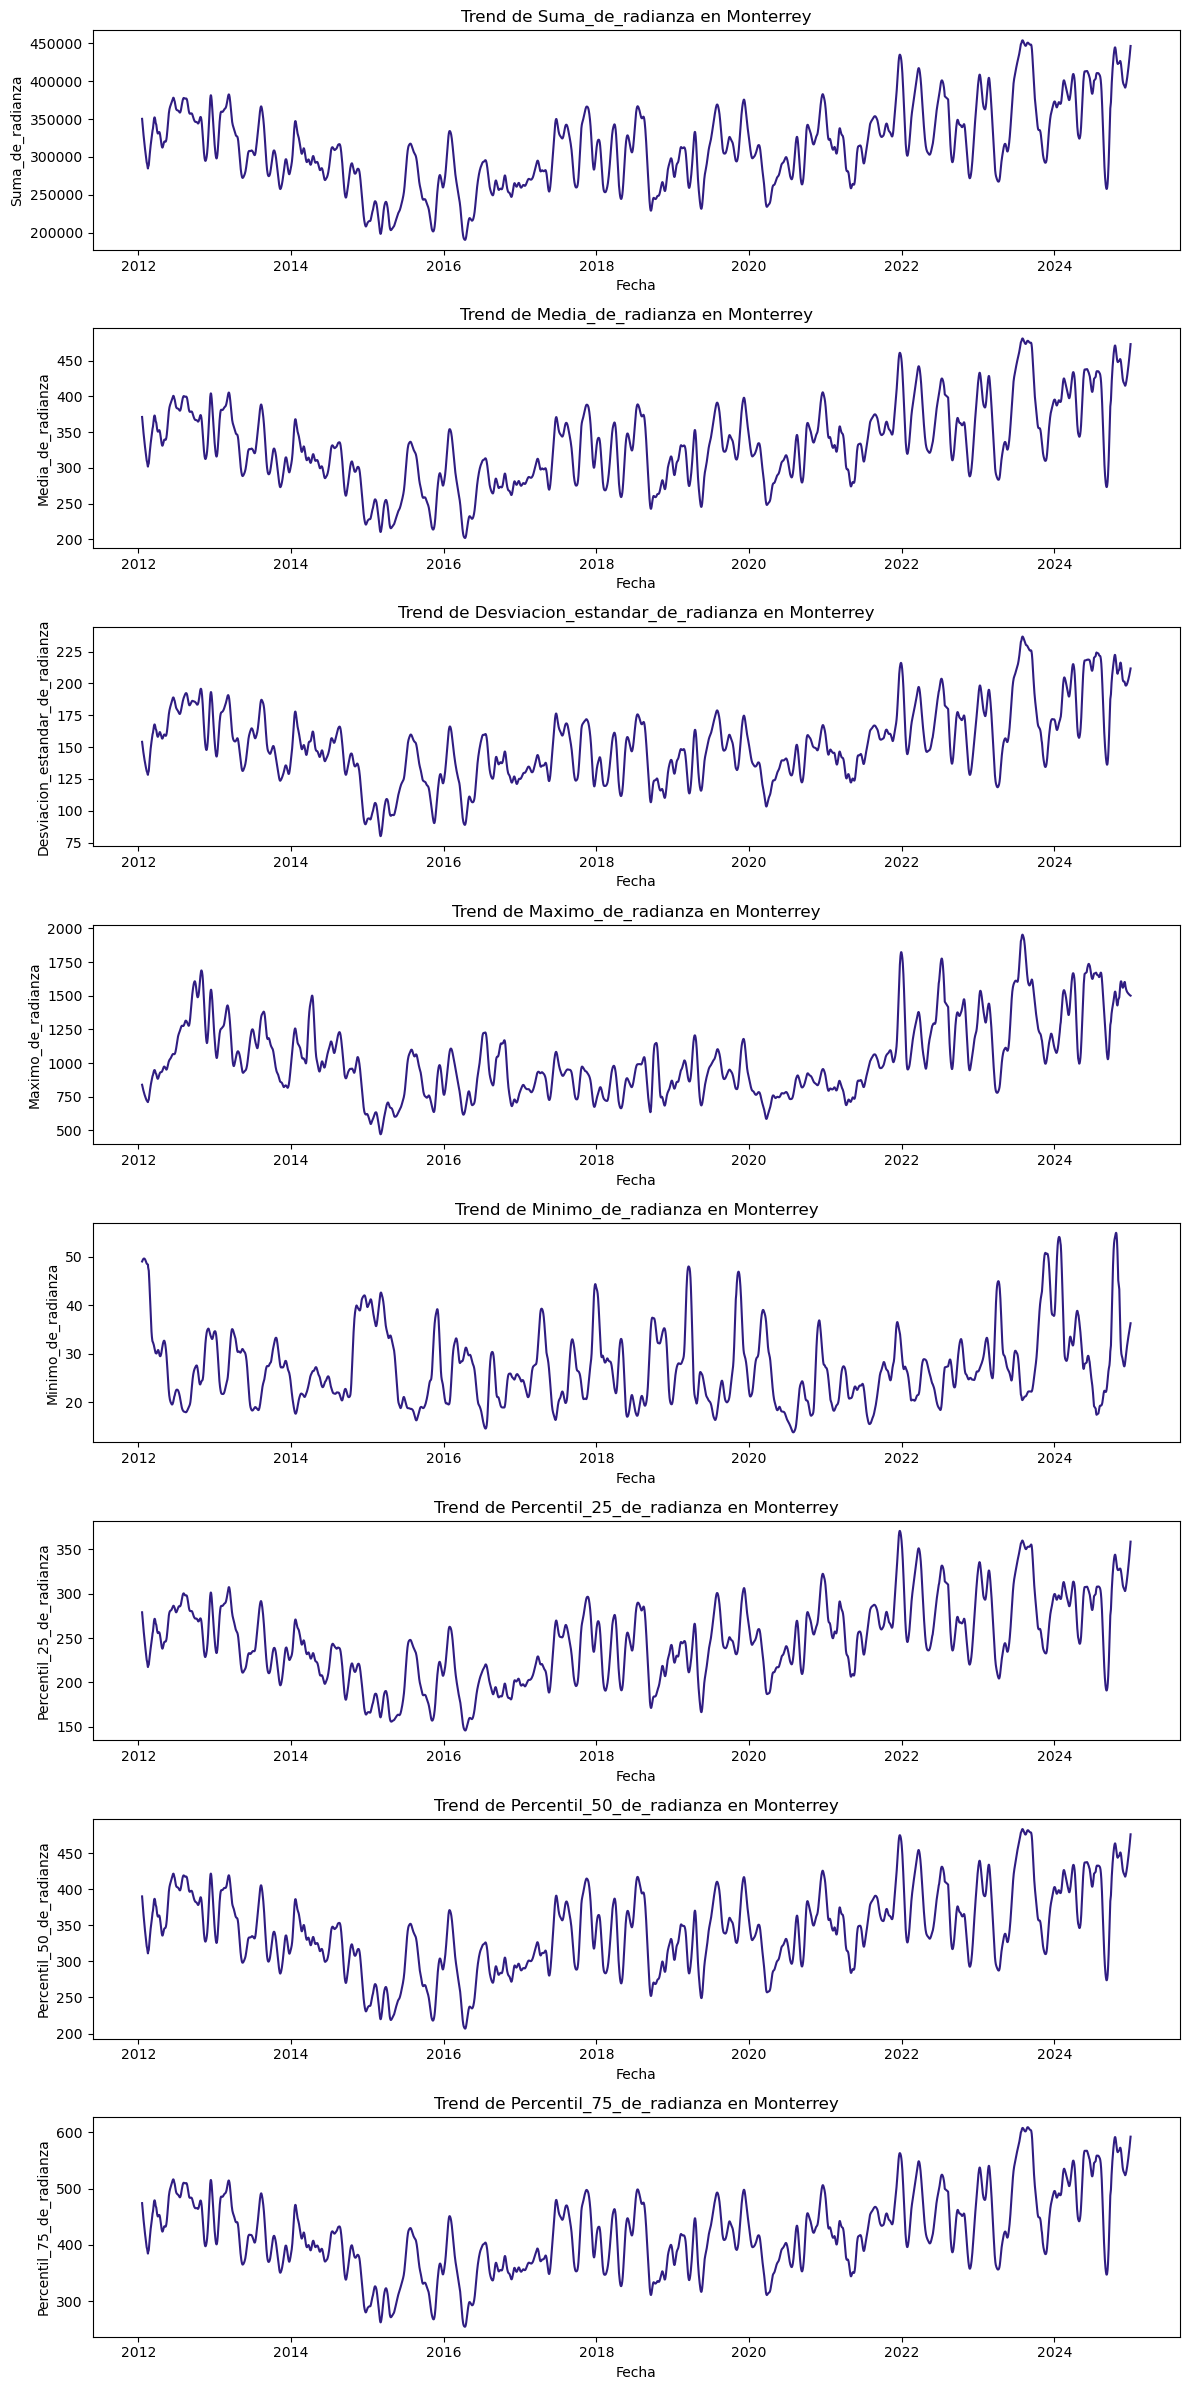

In [118]:
fig, axes = plt.subplots(len(medidas), 1, figsize=(12, 3 * len(medidas)), sharex=False)  # Cambia sharex a False
for i, medida in enumerate(medidas):
    sns.lineplot(data=mont_trend, x="fecha", y=medida, color="#301D82", ax=axes[i])
    axes[i].set_title(f"Trend de {medida} en Monterrey")
    axes[i].set_xlabel("Fecha")
    axes[i].set_ylabel(medida)
plt.tight_layout()
plt.show()
